In [21]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import StratifiedKFold
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold

## Сгенерируй фолды для регрессии

In [2]:
df = pd.read_csv('./stratified_valid.csv')
df

car_id  target_reg  num_fold
0     y13744087j     9492.96       NaN
1     O41613818T     2656.23       NaN
2     d-2109686j     1526.11       NaN
3     u29695600e     1338.00       NaN
4     N-8915870N      825.72       NaN
...          ...         ...       ...
2332  j21246192N      547.30       NaN
2333  h-1554287F    26414.19       NaN
2334  A15262612g     2677.95       NaN
2335  W-2514493U     2213.63       NaN
2336  z-1337463D     2943.33       NaN

[2337 rows x 3 columns]

In [3]:
X = df[['car_id']].copy()
y = df[['target_reg']].copy()

In [4]:
cv = 10
kb = KBinsDiscretizer(n_bins=cv, encode='ordinal', strategy='quantile', random_state=42)

In [5]:
kb.fit(y)

KBinsDiscretizer(encode='ordinal', n_bins=10, random_state=42)

In [6]:
yt = kb.transform(y)
yt

array([[9.],
       [5.],
       [3.],
       ...,
       [5.],
       [4.],
       [5.]])

In [7]:
y = yt.ravel().astype('int8')
y

array([9, 5, 3, ..., 5, 4, 5], dtype=int8)

In [8]:
cv = 10
skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)

In [9]:
for i, (train, test) in enumerate(skf.split(X, y)):
    df.loc[test, 'num_fold'] = i
    
df['num_fold'] = df['num_fold'].astype('int8')

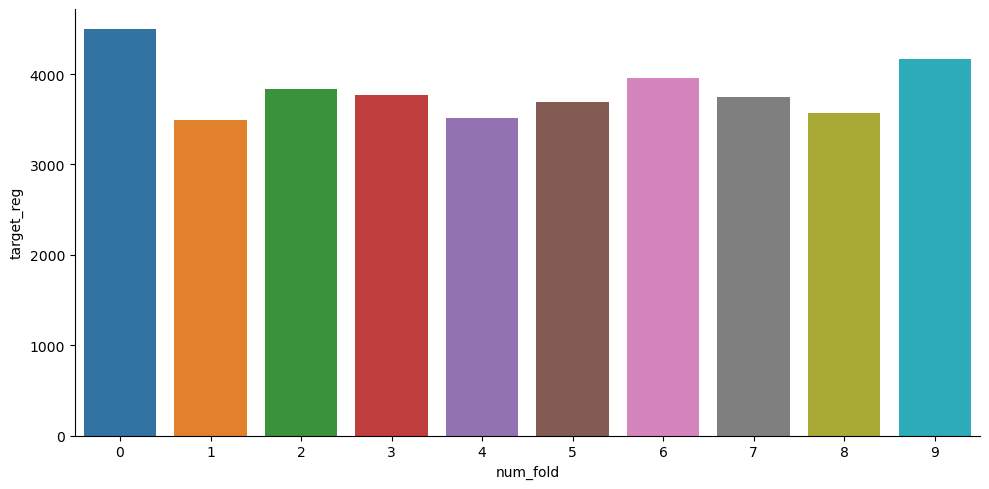

In [10]:
tmp = df.groupby('num_fold', as_index=False)['target_reg'].agg('mean')
sns.catplot(data = tmp, x = 'num_fold', y = 'target_reg', aspect=2, kind="bar");

In [11]:
df.groupby('num_fold', as_index=False)['target_reg'].agg('mean')['target_reg'].std()

313.53342432687225

In [12]:
df.to_csv('./ansver 2.4.csv', index=False)

## Сгенерируй фолды для multi-label классификации

In [29]:
cv = 5

In [30]:
df = pd.read_csv('./multi_label.csv')
df

ID  Computer Science  Physics  Mathematics  Statistics  \
0      9431                 1        0            1           1   
1      7960                 1        1            0           1   
2      8578                 1        1            0           1   
3      1651                 1        0            1           1   
4      4011                 1        0            1           1   
...     ...               ...      ...          ...         ...   
9995   3819                 1        0            0           0   
9996   3817                 0        1            0           0   
9997   3816                 1        0            0           0   
9998   3814                 0        1            0           0   
9999  10000                 0        0            1           0   

      Quantitative Biology  Quantitative Finance  Chemistry  Astrology  \
0                        0                     0          0          0   
1                        0                     0          0          0   
2                        0                     0          0          0   
3                        0                     0          0          0   
4                        0                     0          0          0   
...                    ...                   ...        ...        ...   
9995                     0                     0          0          0   
9996                     0                     0          1          0   
9997                     0                     0          0          0   
9998                     0                     0          0          0   
9999                     0                     0          0          0   

      Spaceology  Life Science  Earth Science  Data Science  
0              0             0              0             0  
1              0             0              0             1  
2              0             1              0             0  
3              0             0              0             0  
4              0             0              0             0  
...          ...           ...            ...           ...  
9995           0             0              0             0  
9996           0             0              0             1  
9997           0             1              0             0  
9998           0             1              0             1  
9999           0             0              0             1  

[10000 rows x 13 columns]

In [31]:
targets = ['Computer Science', 'Physics', 'Mathematics', 'Statistics',
           'Quantitative Biology', 'Quantitative Finance', 'Chemistry',
           'Astrology', 'Spaceology', 'Life Science', 'Earth Science', 'Data Science']

In [32]:
X = df[['ID']].copy()
y = df[targets].copy()

In [33]:
mlskf = MultilabelStratifiedKFold(n_splits=cv, shuffle=True, random_state=42)

In [34]:
for i, (train, test) in enumerate(mlskf.split(X, y)):
    df.loc[test, 'kfold'] = i
    
df['kfold'] = df['kfold'].astype('int8')

In [35]:
tmp = df.groupby(['kfold'], as_index=False).sum()  
tmp_melt = tmp.melt(id_vars = 'kfold', value_vars = targets, value_name = 'count', var_name = 'class')
print(tmp_melt.groupby(['class'], as_index=False).std()['count'].mean())

0.34002113116881


In [36]:
df.to_csv('./answer 2.4.3.csv', index=False)